## TODO

Filter by course level (1000, 2000, 3000, and 4000) with filtered data sets that are adjusted for outliers and find and analyze trends. Edit all of the language in the markdown sections to make it sound less robotic.

It looks like lower level courses have worse average gpa actually so talk about gen eds and weed out courses and contrary to popular belief higher level courses may not be harder since they have higher distribution, or it could be the case that by then students are accumalated to the academic rigor and tend to perform better by the time they get to higher level courses.

Add more visualization - use different graphs other than line, throw one in there comparing original avg gpas and filtered by outliers to show the different like a side by side horizontal bar graph or something. Think of ways to visualize the data based on the numeric outputs you're getting.

Split up the first code cells into data output and plots

Print the total number of data points

Figure out how there are courses above 6000 level and where they are in the dataset. Edit - apparentaly they exist, dont include those above 6000 for our purposes.

## Introduction

Understanding the relationship between academic performance, as exemplified by Grade Point Average (GPA), and post-graduation success, such as job earnings and career satisfaction, is a large topic of interest and debate within educational research. GPA is often used as a proxy for student ability, work ethic, and potential for future success. Numerous studies have explored the relationship between GPA and various success metrics, including job earnings, career satisfaction, and graduate school admission. For instance, Gockel (2015) found a significant relationship between GPA and job performance, reinforcing the notion that academic success might predict job success.

However, it's crucial to consider potential biases and uncontrollable factors that might influence these findings. Variables such as grading standards, course rigor, and the academic discipline on GPA can vary widely, potentially skewing the perceived relationship between GPA and success. Moreover, intrinsic factors such as student background and personal motivation are important to consider as well. Temporal factors also play a role; for example, in the academic year 2023-2024, only Fall term grades are currently available, potentially limiting the comprehensiveness of performance analyses due to the absence of Spring term data.

It's also critical to recognize the multi-dimensional nature of success. Focusing predominantly on earnings or job performance as measures of success overlooks other crucial dimensions, including personal fulfillment and societal contribution. As discussed by York, Gibson, and Rankin (2015), a comprehensive understanding of post-graduation outcomes should transcend academic metrics.

In this context, our project embarks on an exploration of the grade distribution among Virginia Tech classes spanning from 2016 to 2024. The objective is to uncover discernible patterns within these distributions, which may shed light on the nuances of academic achievement and its broader implications. By analyzing data across different departments and terms, we aim to provide insights that could inform educational policy and practice, ensuring a balanced interpretation that acknowledges both the merits and the limitations of GPA as a predictor of future success.

This investigation is not just a quantitative analysis of GPA across years but an effort to understand the broader educational landscape at Virginia Tech, encompassing the interplay of academic rigor, grading practices, and the varied experiences of students across different disciplines. Through this project, we hope to contribute to a more nuanced conversation about academic performance, success, and the value of education in shaping students' futures.

## Data Loading
This cell imports necessary libraries for data manipulation and visualization, then loads various datasets representing GPA distributions from 2016 to 2024 for the entire university and specific departments like Engineering, Business, and Science.

In [1]:
import pandas as pd

all_data_2016_2024 = pd.read_csv('2016-2024_Dist.csv')
engineering_data_2016_2024 = pd.read_csv('2016-2024_Engineering_Dist.csv')
business_data_2016_2024 = pd.read_csv('2016-2024_Business_Dist.csv')
science_data_2016_2024 = pd.read_csv('2016-2024_Science_Dist.csv')

## Trend Analysis of GPA Over Years
In this phase of the analysis, we investigate the evolution of GPA over the academic years from 2016 to 2024. This investigation is critical for understanding long-term trends in academic performance, potentially highlighting periods of grade inflation or deflation. By converting the 'Academic Year' to a numeric format and calculating the average GPA for each year, we obtain a clear, temporal overview of how GPAs have changed over time. The subsequent line plot visually represents these changes, offering an intuitive grasp of trends. A rising line might suggest grade inflation, while a declining one could indicate deflation or increased academic rigor. This temporal analysis is crucial for educational stakeholders aiming to assess the impact of policy changes, curriculum adjustments, or pedagogical strategies over the years. The visualization not only makes these trends accessible but also lays the groundwork for more detailed, year-on-year or department-specific investigations into what drives changes in GPA.

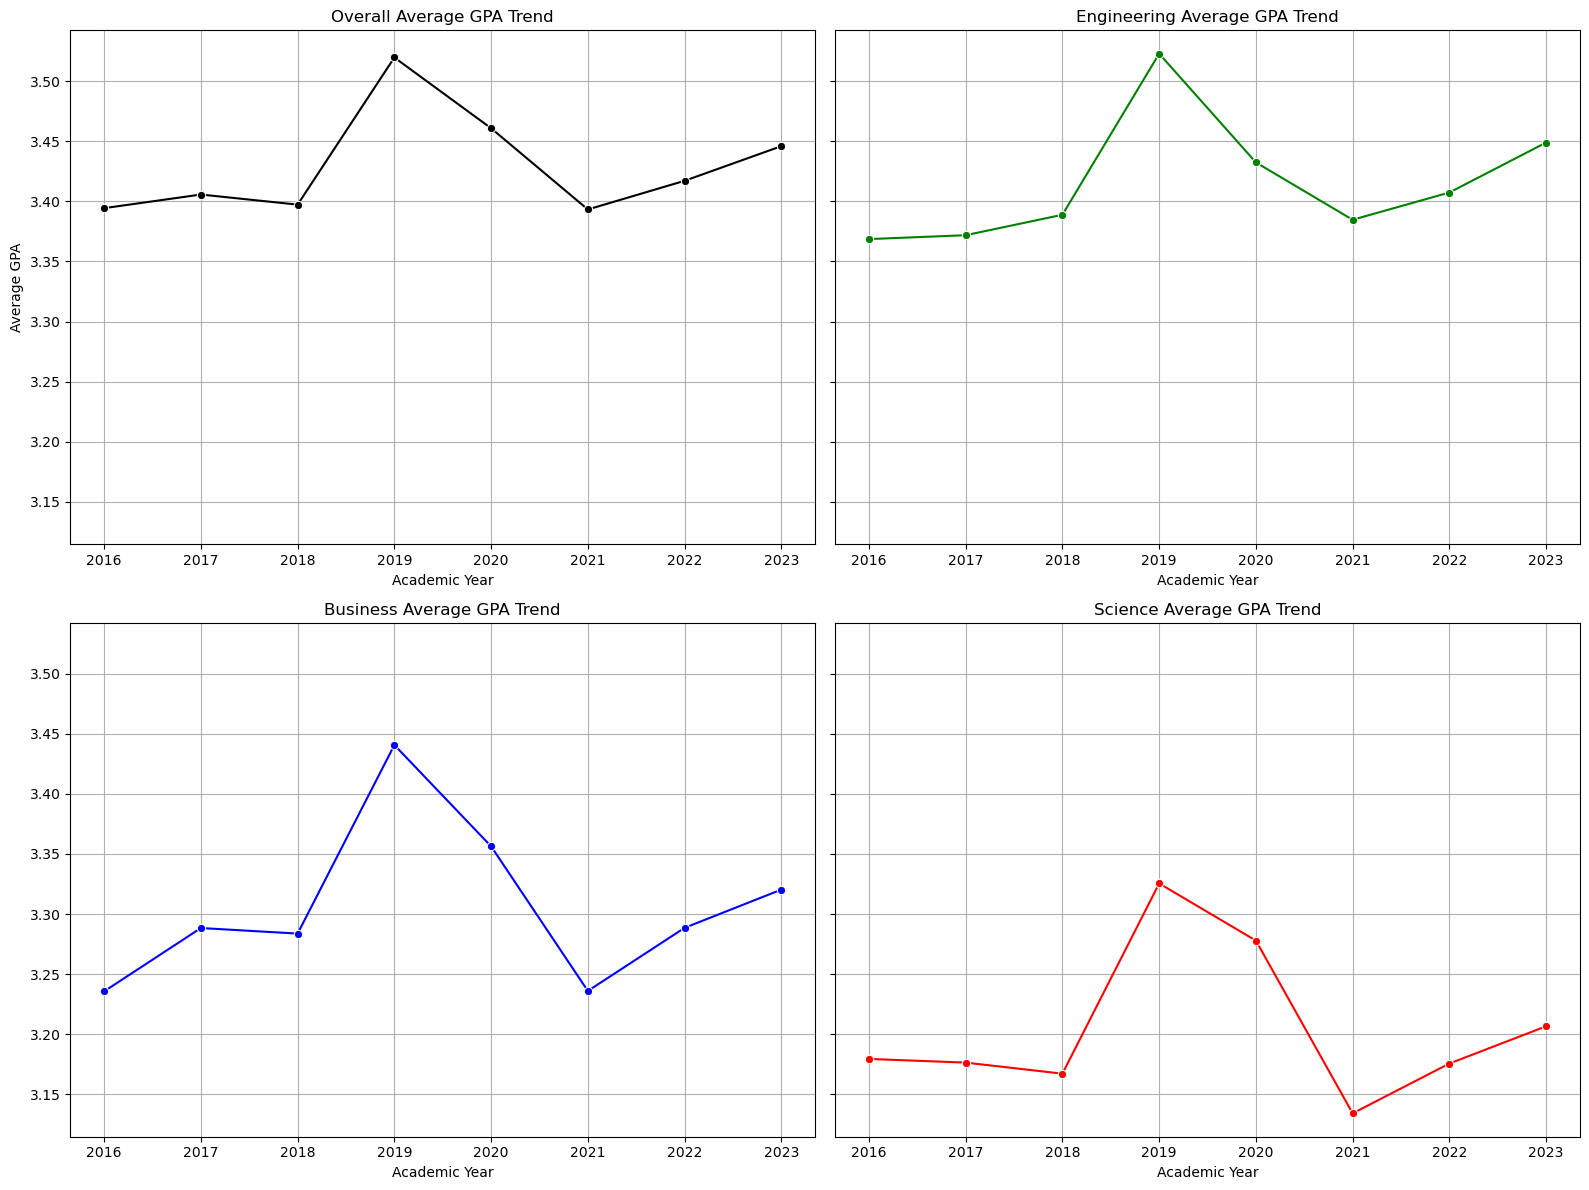

Overall Average GPA: 3.43
Engineering Average GPA: 3.41
Business Average GPA: 3.31
Science Average GPA: 3.21


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to convert academic year and calculate average GPA per year
def process_data(df):
    df['Year'] = df['Academic Year'].apply(lambda x: int(x.split('-')[0]))
    return df.groupby('Year')['GPA'].mean().reset_index()

# Calculate average GPA per academic year for all datasets
avg_gpa_over_years_all = process_data(all_data_2016_2024)
avg_gpa_over_years_engineering = process_data(engineering_data_2016_2024)
avg_gpa_over_years_business = process_data(business_data_2016_2024)
avg_gpa_over_years_science = process_data(science_data_2016_2024)

data_list = [
    (avg_gpa_over_years_all, 'Overall Average GPA Trend', 'black'),
    (avg_gpa_over_years_engineering, 'Engineering Average GPA Trend', 'green'),
    (avg_gpa_over_years_business, 'Business Average GPA Trend', 'blue'),
    (avg_gpa_over_years_science, 'Science Average GPA Trend', 'red')
]

# Create a 2x2 grid for plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharey=True)

# Unpack the axes for easier access
axes = axes.flatten()

# Loop through your data_list and plot each subplot
for ax, (data, title, color) in zip(axes, data_list):
    sns.lineplot(data=data, x='Year', y='GPA', marker='o', color=color, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Academic Year')
    ax.set_ylabel('Average GPA' if 'Overall' in title else '')  # Only set y-label for the first plot
    ax.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print the overall average GPA for each college and overall
overall_avg_gpa = all_data_2016_2024['GPA'].mean()
engineering_avg_gpa = engineering_data_2016_2024['GPA'].mean()
business_avg_gpa = business_data_2016_2024['GPA'].mean()
science_avg_gpa = science_data_2016_2024['GPA'].mean()

print(f'Overall Average GPA: {overall_avg_gpa:.2f}')
print(f'Engineering Average GPA: {engineering_avg_gpa:.2f}')
print(f'Business Average GPA: {business_avg_gpa:.2f}')
print(f'Science Average GPA: {science_avg_gpa:.2f}')

## Surprising Results

Upon examining the average GPA by department and then drilling down to the subject and course level, a notable and perhaps surprising observation emerges: the overall average GPA across different departments—Engineering (3.41), Business (3.31), Science (3.21), and the cumulative overall average (3.43)—hovers around a markedly high range. One might initially expect a broader distribution of GPA averages, especially in a rigorous academic setting where a variety of factors can impact student performance.

This pattern raises questions about the underlying causes of such high averages. Traditionally, an A- grade is pegged at a 3.7 GPA, suggesting that courses with average GPAs exceeding this threshold are outliers with unusually high academic performance. Identifying over 20,000 instances where the average GPA exceeded 3.7 indicates a significant volume of data potentially skewing overall GPA calculations upward. This skewness could be attributed to a range of factors, from grading leniencies to specific departmental policies or even the nature of the courses themselves.

Interestingly, the analysis revealed zero outliers on the lower end of the spectrum where the GPA was below 1.0. This absence of low outliers, combined with the presence of high outliers, suggests that the original average GPA figures may have been artificially inflated. Such a scenario underscores the importance of data cleaning and the critical need to filter for outliers to ensure an accurate and realistic portrayal of academic performance trends.

## Outliers

The presence of outliers, especially those representing courses with extraordinarily high average GPAs, warrants careful consideration. In the context of this analysis, courses with average GPAs of 3.7 and above were deemed extreme and, therefore, unrealistic outliers. These outliers, while numerically few compared to the dataset's overall size, exert a disproportionate influence on the computed mean GPAs, leading to an inflated perception of academic performance.

Cleaning the dataset to exclude these outliers is a pivotal step in refining the analysis. By adjusting the thresholds to consider high GPAs (above 3.7) as outliers, we aim to mitigate the skewness and achieve a more balanced and credible overview of GPA trends. This adjusted perspective is crucial for stakeholders, including academic policymakers, instructors, and students, as it offers a more grounded understanding of grading practices and their evolution over time.

Moreover, this outlier analysis serves as a springboard for further investigation into the factors contributing to such high GPA averages. Whether these are indicative of grade inflation, shifts in educational standards, or other variables, remains an open question. As academic institutions strive for fairness and rigor in evaluation, understanding the distribution of GPAs—and the outliers within that distribution—becomes essential in shaping policies that accurately reflect student achievement and learning outcomes.

High (3.7+) & Low (1.0-) GPAs removed (Overall): 23028 high, 0 low
High (3.7+) & Low (1.0-) GPAs removed (Engineering): 3845 high, 0 low
High (3.7+) & Low (1.0-) GPAs removed (Business): 1248 high, 0 low
High (3.7+) & Low (1.0-) GPAs removed (Science): 3646 high, 0 low
Filtered Overall Average GPA: 3.18
Filtered Engineering Average GPA: 3.17
Filtered Business Average GPA: 3.17
Filtered Science Average GPA: 3.00


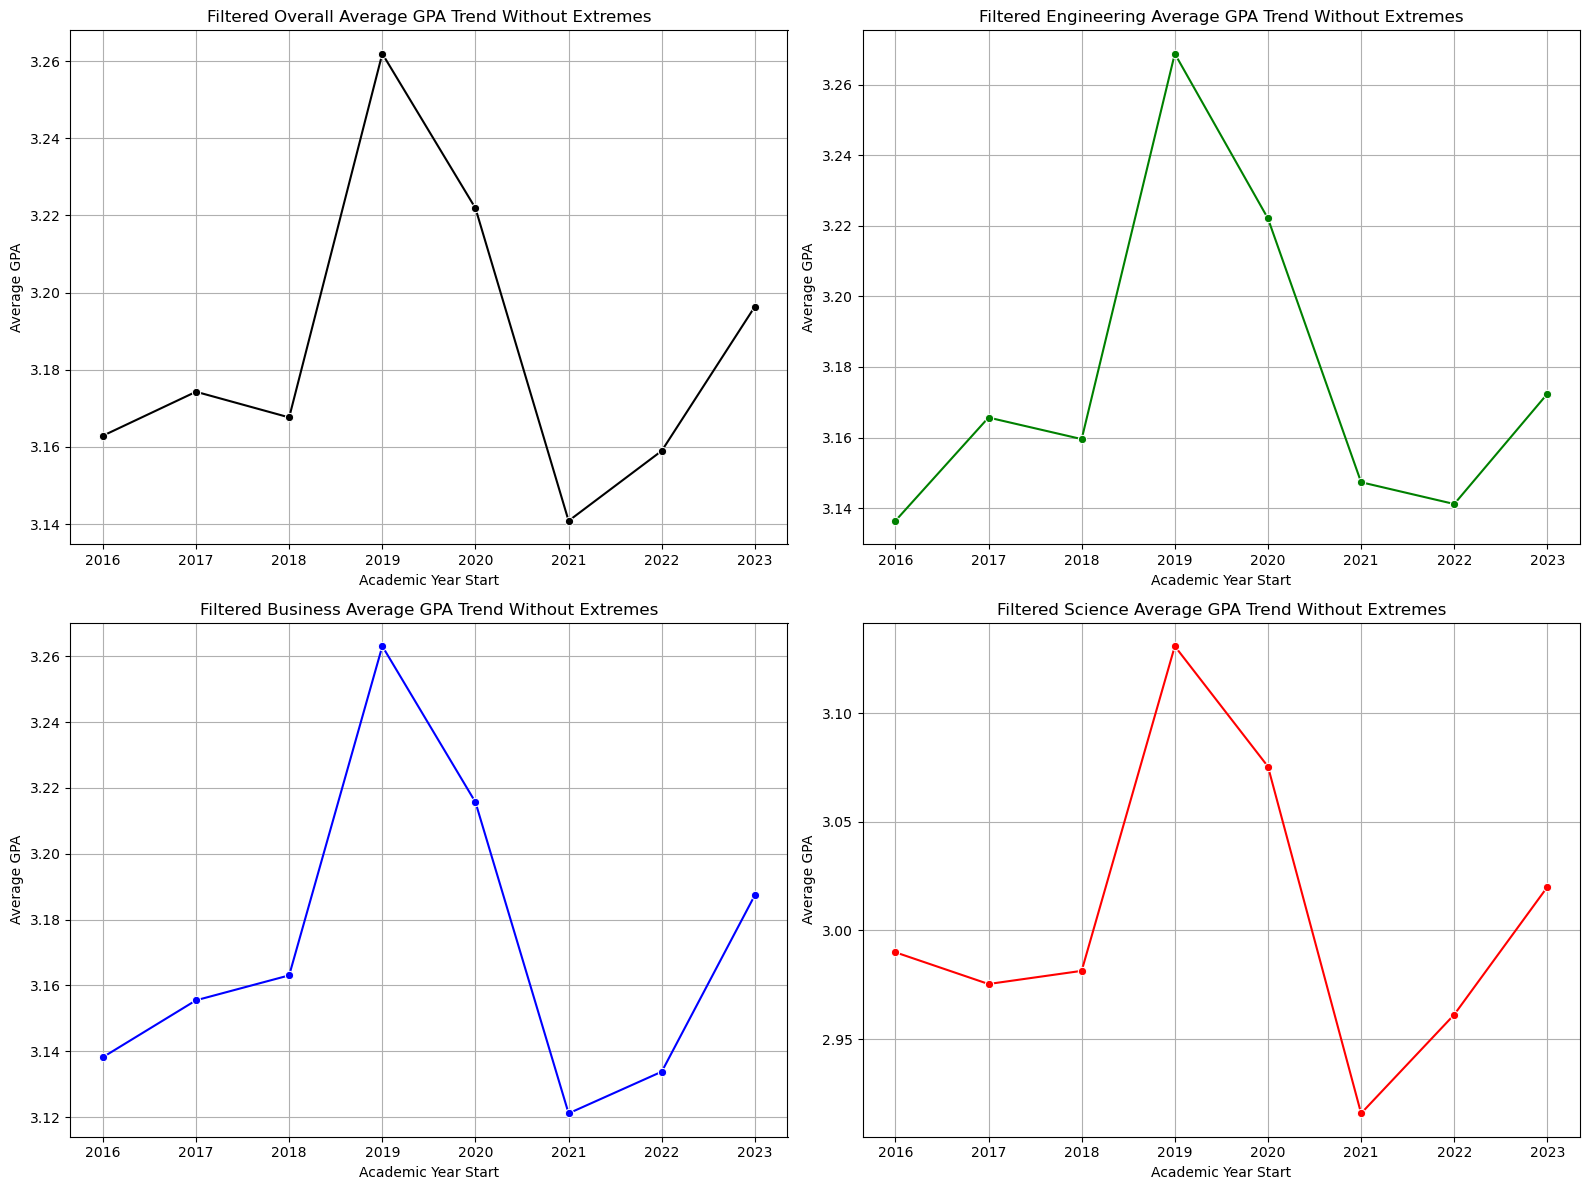

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def filter_gpas(df):
    """Remove entries with a GPA of 3.7 and above, and 1.0 and below."""
    count_high_gpa = len(df[df['GPA'] >= 3.7])  # Count high GPA entries
    count_low_gpa = len(df[df['GPA'] <= 1.0])  # Count low GPA entries
    # Remove entries where GPA is 3.7 and above, or 1.0 and below
    df_filtered = df[(df['GPA'] < 3.7) & (df['GPA'] > 1.0)].copy()
    df_filtered['Year'] = df_filtered['Academic Year'].apply(lambda x: int(x.split('-')[0]))
    return df_filtered, count_high_gpa, count_low_gpa

def calculate_average_gpa_per_year(df):
    """Calculate the average GPA per year."""
    return df.groupby('Year')['GPA'].mean().reset_index()

# Apply the filtering function and count removed GPAs
all_data_filtered, count_all_high, count_all_low = filter_gpas(all_data_2016_2024)
engineering_filtered, count_eng_high, count_eng_low = filter_gpas(engineering_data_2016_2024)
business_filtered, count_bus_high, count_bus_low = filter_gpas(business_data_2016_2024)
science_filtered, count_sci_high, count_sci_low = filter_gpas(science_data_2016_2024)

# Print the count of removed GPAs
print(f'High (3.7+) & Low (1.0-) GPAs removed (Overall): {count_all_high} high, {count_all_low} low')
print(f'High (3.7+) & Low (1.0-) GPAs removed (Engineering): {count_eng_high} high, {count_eng_low} low')
print(f'High (3.7+) & Low (1.0-) GPAs removed (Business): {count_bus_high} high, {count_bus_low} low')
print(f'High (3.7+) & Low (1.0-) GPAs removed (Science): {count_sci_high} high, {count_sci_low} low')

# Recalculate the average GPAs
avg_gpa_all_filtered = calculate_average_gpa_per_year(all_data_filtered)
avg_gpa_engineering_filtered = calculate_average_gpa_per_year(engineering_filtered)
avg_gpa_business_filtered = calculate_average_gpa_per_year(business_filtered)
avg_gpa_science_filtered = calculate_average_gpa_per_year(science_filtered)

# Print the recalculated overall average GPAs
print(f'Filtered Overall Average GPA: {all_data_filtered["GPA"].mean():.2f}')
print(f'Filtered Engineering Average GPA: {engineering_filtered["GPA"].mean():.2f}')
print(f'Filtered Business Average GPA: {business_filtered["GPA"].mean():.2f}')
print(f'Filtered Science Average GPA: {science_filtered["GPA"].mean():.2f}')

# Re-plotting in a 2x2 grid layout with the filtered datasets
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12)) 

# Plotting each college in a separate subplot with filtered data
datasets = [avg_gpa_all_filtered, avg_gpa_engineering_filtered, avg_gpa_business_filtered, avg_gpa_science_filtered]
titles = ['Overall', 'Engineering', 'Business', 'Science']
colors = ['black', 'green', 'blue', 'red']

for ax, dataset, title, color in zip(axes.flat, datasets, titles, colors):
    sns.lineplot(data=dataset, x='Year', y='GPA', marker='o', ax=ax, color=color)
    ax.set_title(f'Filtered {title} Average GPA Trend Without Extremes')
    ax.set_xlabel('Academic Year Start')
    ax.set_ylabel('Average GPA')
    ax.grid(True)

plt.tight_layout()
plt.show()

## Filtering by Course Level TODO
after removing outliers

## Group Courses into Levels

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def categorize_course_level(course_no):
    # Use the first digit of the course number to categorize course level
    return int(str(course_no)[0]) * 1000

def filter_gpas(df):
    """Remove entries with a GPA of 3.7 and above, and 1.0 and below."""
    # Create a filtered DataFrame without modifying the original
    filtered_df = df[(df['GPA'] < 3.7) & (df['GPA'] > 1.0)].copy()
    filtered_df.loc[:, 'Course Level'] = filtered_df['Course No.'].apply(categorize_course_level)
    return filtered_df

def analyze_course_levels(df):
    """Analyze course levels by counting courses and calculating average GPA."""
    # Instead of modifying the original DataFrame, we create a copy with the new column
    df_with_levels = df.copy()
    df_with_levels['Course Level'] = df_with_levels['Course No.'].apply(categorize_course_level)
    level_analysis = df_with_levels.groupby('Course Level').agg(Count=('GPA', 'size'), Average_GPA=('GPA', 'mean')).reset_index()
    return level_analysis

# Filter the datasets
all_data_filtered = filter_gpas(all_data_2016_2024)
engineering_filtered = filter_gpas(engineering_data_2016_2024)
business_filtered = filter_gpas(business_data_2016_2024)
science_filtered = filter_gpas(science_data_2016_2024)

# Analyze course levels
level_analysis_all = analyze_course_levels(all_data_filtered)
level_analysis_engineering = analyze_course_levels(engineering_filtered)
level_analysis_business = analyze_course_levels(business_filtered)
level_analysis_science = analyze_course_levels(science_filtered)

# Printing the analysis results
print("Course Level Analysis for All Departments:")
print(level_analysis_all)
print("\nCourse Level Analysis for Engineering:")
print(level_analysis_engineering)
print("\nCourse Level Analysis for Business:")
print(level_analysis_business)
print("\nCourse Level Analysis for Science:")
print(level_analysis_science)

Course Level Analysis for All Departments:
   Course Level  Count  Average_GPA
0          1000  10872     3.143708
1          2000  11558     3.102362
2          3000   9535     3.179896
3          4000   7253     3.249072
4          5000   2993     3.462122
5          6000    350     3.424286
6          7000     15     3.086000
7          8000     55     3.159636
8          9000     29     3.207931

Course Level Analysis for Engineering:
   Course Level  Count  Average_GPA
0          1000    741     3.282105
1          2000   1652     3.007215
2          3000   2150     3.054028
3          4000   1674     3.237378
4          5000   1132     3.461254
5          6000     68     3.519853

Course Level Analysis for Business:
   Course Level  Count  Average_GPA
0          1000    307     3.108274
1          2000   1017     3.047266
2          3000   1480     3.096757
3          4000   1534     3.223501
4          5000    513     3.476218
5          6000     22     3.444545

Course Level An

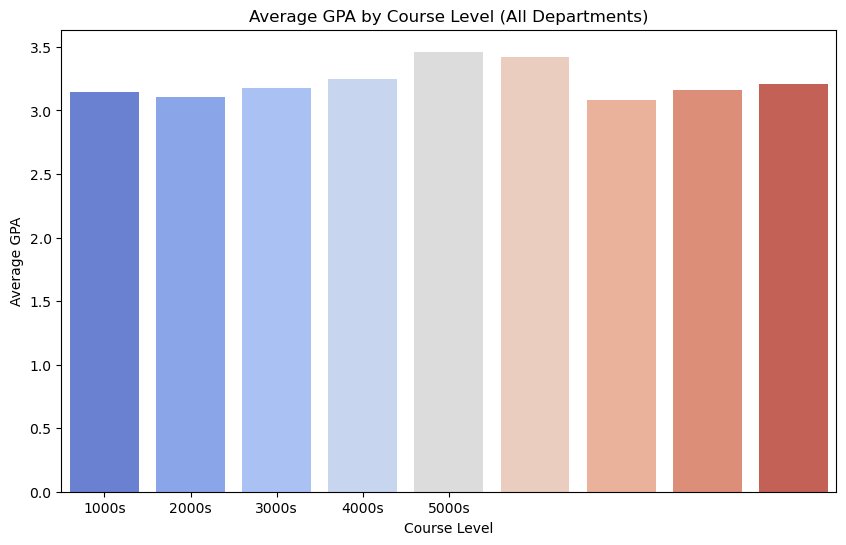

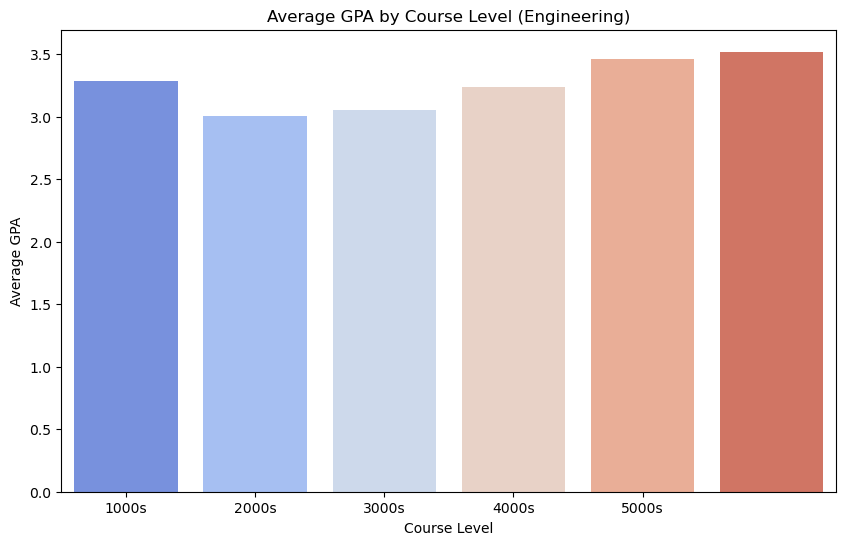

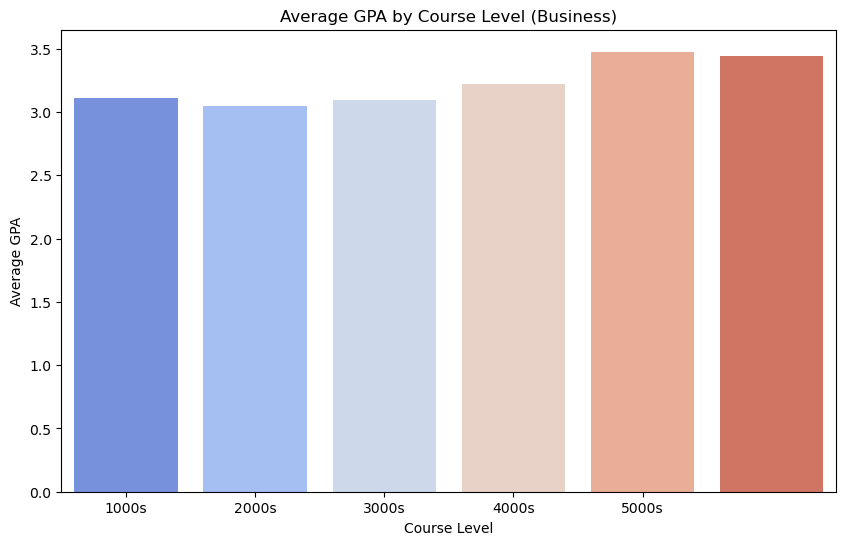

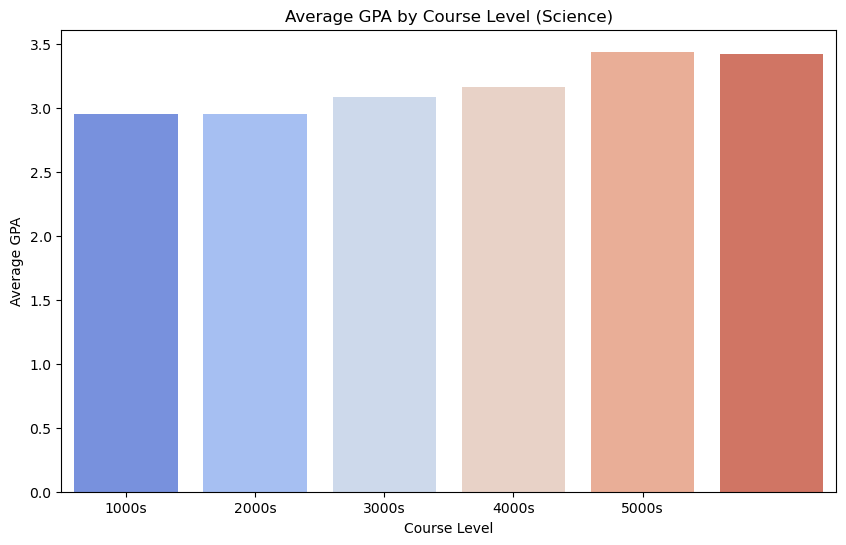

In [5]:
# Data visualization
def plot_course_level_analysis(level_analysis, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Course Level', y='Average_GPA', data=level_analysis, palette='coolwarm')
    plt.title(title)
    plt.xlabel('Course Level')
    plt.ylabel('Average GPA')
    plt.xticks([0, 1, 2, 3, 4], ['1000s', '2000s', '3000s', '4000s', '5000s'])
    plt.show()

plot_course_level_analysis(level_analysis_all, 'Average GPA by Course Level (All Departments)')
plot_course_level_analysis(level_analysis_engineering, 'Average GPA by Course Level (Engineering)')
plot_course_level_analysis(level_analysis_business, 'Average GPA by Course Level (Business)')
plot_course_level_analysis(level_analysis_science, 'Average GPA by Course Level (Science)')

## Statistical Analysis with ANOVA
To conduct a comprehensive analysis of GPA variances across all university departments, we applied the ANOVA test to the entire dataset. ANOVA, or Analysis of Variance, is designed to assess if there is a statistically significant difference between the means of three or more independent groups - in our scenario, the various departments of the university. This test helps us discern whether departmental affiliations impact GPA outcomes in a significant manner. A p-value below the standard threshold of 0.05 would indicate that the differences in GPA distributions among the departments are not just random fluctuations but statistically significant.

The process included grouping GPAs by their respective departments and then organizing them suitably for the ANOVA test, where each group of GPAs was treated as an independent sample. The f_oneway function from scipy.stats was used to execute the ANOVA test across these grouped GPAs.

The results were clear: an F-statistic of approximately 201.32 and a p-value of 0.0, which is so low that it rounds down to zero, demonstrate a highly significant difference in average GPAs across departments. This suggests a non-uniform distribution of GPAs, pointing to substantial variances that merit further exploration.

The ANOVA's significant findings serve as a prompt for deeper inquiries into which departments stand out from the rest and why. It could lead to uncovering relationships with course difficulty, departmental policies, or teaching methods. Identifying where these GPA differences lie is essential in any academic evaluation, especially in the context of potential grade inflation or deflation.

The F-statistic in this context compares the between-group variance, reflecting the variability of departmental mean GPAs from the overall mean GPA, to the within-group variance, which measures how individual GPAs deviate from their departmental averages. The high F-statistic observed suggests that departmental membership is a determinant factor in the GPA outcomes, signifying that the observed variance in GPAs across departments is substantial and not attributable to random chance. The negligible p-value lends further credence to these findings, affirming the need for additional investigative steps to delve into the specific nature of departmental disparities and their underlying causes.

In [6]:
from scipy import stats

# Group the dataset by 'Subject' (Department) and aggregate GPAs into lists for each department
gpa_by_dept = all_data_2016_2024.groupby('Subject')['GPA'].apply(list).values.tolist()

# Perform ANOVA test across all departments
anova_result_all = stats.f_oneway(*gpa_by_dept)

# Display the ANOVA test result
anova_result_all

F_onewayResult(statistic=201.31712634793263, pvalue=0.0)

## Machine Learning Model for GPA Prediction
This segment of the analysis leverages machine learning to predict GPA outcomes based on departmental affiliation and academic term. By employing one-hot encoding, we transform categorical variables into a numerical format that can be processed by machine learning algorithms. This preprocessing step is vital as it allows the model to interpret and learn from these categorical features effectively. A linear regression model is then trained on a subset of the data, aiming to discern patterns or relationships between the input features and GPA. The model's performance is quantitatively evaluated using the Mean Squared Error (MSE) metric, which provides a measure of the prediction accuracy by calculating the average of the squares of errors between the predicted and actual GPA values. The lower the MSE, the more accurate the model's predictions. Presenting the first few predictions alongside the MSE offers a snapshot of how well the model can estimate GPA based on the given features. This predictive modeling approach is not only valuable for understanding the influence of departmental and temporal factors on GPA but also for forecasting future GPA trends or identifying areas where interventions might be necessary to address academic performance issues.

In [7]:
# Create sets of unique subjects for each college
business_subjects = set(business_data_2016_2024['Subject'].unique())
engineering_subjects = set(engineering_data_2016_2024['Subject'].unique())
science_subjects = set(science_data_2016_2024['Subject'].unique())

# Function to map subjects to college
def map_subject_to_college(subject):
    if subject in business_subjects:
        return 'Business'
    elif subject in engineering_subjects:
        return 'Engineering'
    elif subject in science_subjects:
        return 'Science'
    else:
        return 'Other'

# Apply the function to the main dataset
all_data_2016_2024['College'] = all_data_2016_2024['Subject'].apply(map_subject_to_college)

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# One-hot encode the 'College' variable
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(all_data_2016_2024[['College']])

# Prepare features and target
x = encoded_features
y = all_data_2016_2024['GPA']

# Split the data into training and testing sets, keeping the college information
x_train, x_test, y_train, y_test, colleges_train, colleges_test = train_test_split(
    x, y, all_data_2016_2024['College'], test_size=0.2, random_state=42
)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict and evaluate the model
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)

# Print the Mean Squared Error
print(f'Mean Squared Error: {mse}')
print(f'Predictions (first 5): {predictions[:5]}')

Mean Squared Error: 0.19605906292384123
Predictions (first 5): [3.56692404 3.56692404 3.3058738  3.3058738  3.20925547]


## Visualization of Model Predictions vs. Actual GPA
This visualization is a crucial step in assessing the predictive accuracy of the machine learning model. By plotting the actual GPAs against the predicted GPAs, this scatter plot provides a visual assessment of the model's performance. The inclusion of a line representing perfect predictions (where predicted values exactly match actual values) serves as a benchmark for evaluating the model. Points that closely align with this line indicate accurate predictions, whereas deviations suggest areas where the model may be improved. This graphical representation is instrumental for identifying patterns or biases in the predictions, such as systematic overestimation or underestimation of GPA. It enables a more nuanced analysis beyond numerical metrics like MSE, offering insights into the model's behavior across different GPA ranges or academic contexts. Such visualizations are invaluable for researchers and educators alike, facilitating data-driven discussions on model efficacy, potential improvements, and implications for educational policy and practice.

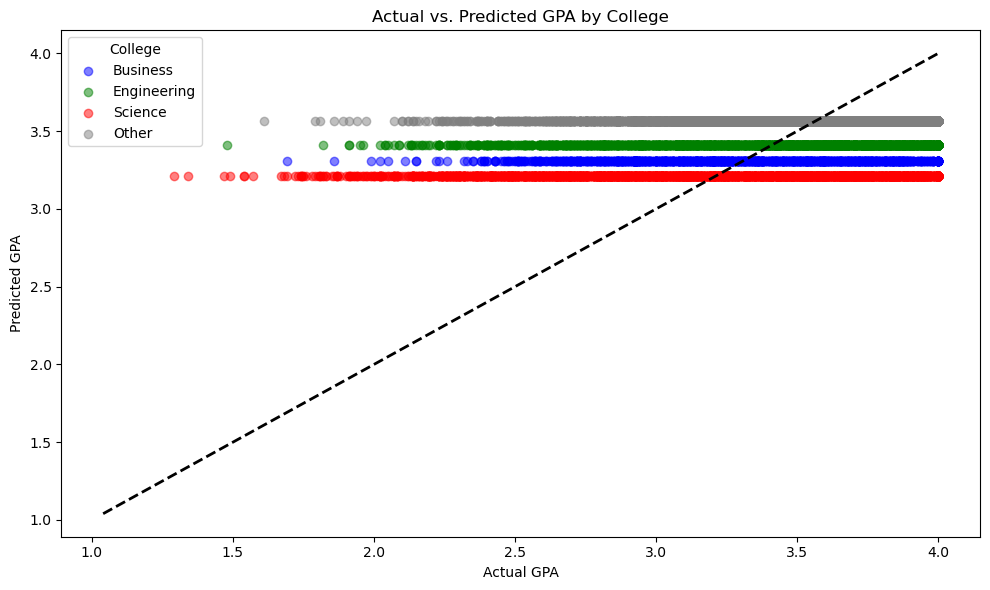

In [9]:
import matplotlib.pyplot as plt

# Create a DataFrame for plotting that includes actual, predicted GPAs, and the college category
results_df = pd.DataFrame({
    'Actual GPA': y_test,
    'Predicted GPA': predictions,
    'College': colleges_test  # Use colleges_test from the train-test split
})

# Define colors for each college
college_colors = {
    'Business': 'blue',
    'Engineering': 'green',
    'Science': 'red',
    'Other': 'gray'
}

# Scatter plot of actual vs predicted values, color-coded by college
plt.figure(figsize=(10, 6))
for college, color in college_colors.items():
    subset = results_df[results_df['College'] == college]
    plt.scatter(subset['Actual GPA'], subset['Predicted GPA'], color=color, alpha=0.5, label=college)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line for perfect predictions
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs. Predicted GPA by College')
plt.legend(title='College')
plt.tight_layout()
plt.show()

## Conclusion
Give a vague conclusion about how we can’t really tell for sure whether GPA correlates to success, we can use the data to help us figure out trends blah blah blah

## References (make sure to add in the paper)

Gockel, C. (2015). The predictive value of grade point average scores in a partial inclusion concurrent enrollment programme. Journal of Research in Special Educational Needs, 15(4), 234-245.

York, T., Gibson, C., & Rankin, S. (2015). Defining and Measuring Academic Success. Journal of College Student Development, 56(2), 105-120.

(Plus the other ones in the proposal doc)